In [2]:
library(metacell)
library(GEOquery)
library(googlesheets4)
library(googledrive)
library(devtools)
library(reshape2)
library(plyr)
library(dplyr)
library(tibble)
library(ggplot2)
library(tidyverse)
library(tgstat)
library(tgconfig)
library(gridExtra)
library(SingleCellExperiment)
library(Seurat)
library(babelgene)
library(zellkonverter)
library(liana)
library(ComplexHeatmap)
library(grid)
library(GOfuncR)
library(cowplot)
library(R.utils)
library(Hmisc)
library(corrplot)
library(pheatmap)
library(shades)
library(ggrepel)
library(ggarchery)
library(rstatix) 
library(RVAideMemoire)
library(cluster)   
library(factoextra) 
library(ggpmisc)
library(glmGamPoi)
library(MASS)
library(clusterProfiler)
library(msigdbr)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)


Attaching package: ‘googledrive’


The followi

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following object is masked from ‘package:SummarizedExperiment’:

    trim


The following object is masked from ‘package:GenomicRanges’:

    trim


The following object is masked from ‘package:IRanges’:

    trim


The following objects are masked from ‘package:devtools’:

    check, unload


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attac

In [3]:
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/metacell_functions.r")
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")

ℹ SHA-1 hash of file is "bda7f06ee7b168c0be4c723ee15644ab99e6421e"
Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: RANN

Loading required package: plotrix

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:plotrix’:

    plotCI


The following object is masked from ‘package:shades’:

    space


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess


Loading required package: parallel

Loading required package: compositions

Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:IRanges’:

    cor, cov, var


The following objects are masked from ‘package:S4Vectors’:

    cor, c

In [4]:
modify_facet_appearance <- function(plot = NULL,
                                    strip.background.x.fill = NULL, 
                                    strip.background.y.fill = NULL,
                                    strip.background.x.col = NULL,
                                    strip.background.y.col = NULL,
                                    strip.text.x.col = NULL,
                                    strip.text.y.col = NULL){
  
  if(is.null(plot)){stop("A ggplot (gg class) needs to be provided!")}
  
  # Generate gtable object to modify the facet strips:
  g <- ggplot_gtable(ggplot_build(plot))
  
  # Get the locations of the right and top facets in g:
  stripy <- which(grepl('strip-r|strip-l', g$layout$name)) # account for when strip positions are switched r-l and/or t-b in facet_grid(switch = )
  stripx <- which(grepl('strip-t|strip-b', g$layout$name))
  
  # Check that the provided value arrays have the same length as strips the plot has:
  lx <- c(length(strip.background.x.fill), length(strip.background.x.col), length(strip.text.x.col))
  if(!all(lx==length(stripx) | lx==0)){stop("The provided vectors with values need to have the same length and the number of facets in the plot!")}
  ly <- c(length(strip.background.y.fill), length(strip.background.y.col), length(strip.text.y.col))
  if(!all(ly==length(stripy) | ly==0)){stop("The provided vectors with values need to have the same length and the number of facets in the plot!")}
  
  # Change the strips on the y axis:
  for (i in seq_along(stripy)){ # if no strips in the right, the loop will not be executed as seq_along(stripy) will be integer(0)
    
    # Change strip fill and (border) colour :
    j1 <- which(grepl('strip.background.y', g$grobs[[stripy[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.background.y.fill[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j1]]$gp$fill <- strip.background.y.fill[i]} # fill
    if(!is.null(strip.background.y.col[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j1]]$gp$col <- strip.background.y.col[i]} # border colour
    
    # Change color of text:
    j2 <- which(grepl('strip.text.y', g$grobs[[stripy[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.text.y.col[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j2]]$children[[1]]$gp$col <- strip.text.y.col[i]}

  }
  
  # Same but for the x axis:
  for (i in seq_along(stripx)){
    
    # Change strip fill and (border) colour :
    j1 <- which(grepl('strip.background.x', g$grobs[[stripx[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.background.x.fill[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j1]]$gp$fill <- strip.background.x.fill[i]} # fill
    if(!is.null(strip.background.x.col[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j1]]$gp$col <- strip.background.x.col[i]} # border colour
    
    # Change color of text:
    j2 <- which(grepl('strip.text.x', g$grobs[[stripx[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.text.x.col[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j2]]$children[[1]]$gp$col <- strip.text.x.col[i]}

  }
  
  return(g) 
  
  # Note that it returns a gtable object. This can be ploted with plot() or grid::draw.grid(). 
  # patchwork can handle the addition of such gtable to a layout with other ggplot objects, 
  # but be sure to use patchwork::wrap_ggplot_grob(g) for proper alignment of plots!
  # See: https://patchwork.data-imaginist.com/reference/wrap_ggplot_grob.html
  
}


In [5]:
type_colors = c("slategray", "brown3", "royalblue3", "darkorchid3")
names(type_colors) = c("Normal", "De novo", "Upregulated", "Both")

In [6]:
if(!dir.exists("scdb")) dir.create("scdb/")
scdb_init("scdb/", force_reinit=T)
#> initializing scdb to testdb/

initializing scdb to scdb/



In [7]:
annot_df <- read.csv("annotations/kinetics_annots.csv", sep=",")
annot_df$label = trimws(annot_df$label)

In [8]:
mat = scdb_mat('all_cells_liana')

In [9]:
sce = readRDS("h5ads/liana_carcinoma_tanmerged.RDS")

In [10]:
seur = CreateSeuratObject(sce@assays@data$counts)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [11]:
seur = NormalizeData(seur, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [12]:
seur@meta.data$Age = sce@colData[rownames(seur@meta.data),'Age']

In [13]:
seur = SetIdent(seur, 
                cells = rownames(sce@colData), 
                value = sce@colData$annots)

In [14]:
ages = age_order = c("10d", "3w", "6w", "8w", "10w", "12w")
conditions = cond_order = c("tumor", "normal")
age_condition_order = paste(rep(rev(cond_order), each=6), rep(age_order, 2), sep="_")

In [15]:
for (i in 1:length(unique(annot_df$label))){
    message(paste(i, unique(annot_df$label)[i], sep=": "))
}

1: Endothelial

2: doublets

3: Mcam Endothelial

4: Dpp4 fibroblasts

5: fibroblasts

6: CAFs

7: Schwann cells

8: Smooth muscle

9: Pericytes

10: Tumor cells

11: Progenitor 1

12: Alveolar

13: Progenitor 2

14: HS

15: Basal

16: Hair-like

17: MyoLum

18: Myoepithelial

19: Mast cells

20: NK cells

21: gd NKT

22: Mreg DCs

23: Basophils

24: B cells

25: T cells

26: CD8 T cells

27: Treg

28: ILC2

29: Perivasc macs

30: Neutrophils

31: Monocytes

32: MonMacs

33: cDC2

34: Ductal macs

35: pDC

36: cDC1



In [16]:
doublet_order = c(2, 16)
doublet_clusters = unique(annot_df$label)[doublet_order]
lymphoid_order = c(25, 26, 27, 21, 20, 28, 24)
myeloid_order = c(31, 32, 29, 34, 36, 33, 35, 22, 19, 23) # removed neutrophils
epithelial_order = c(11, 13, 12, 14, 18, 15, 17, 10)
stromal_order = c(1, 3, 8, 9, 7)
fibroblast_order = c(5, 4, 6)

In [17]:
pop_orders = list(lymphoid=unique(annot_df$label)[lymphoid_order],
                  myeloid=unique(annot_df$label)[myeloid_order],
                  epithelial=unique(annot_df$label)[epithelial_order],
                  stromal=unique(annot_df$label)[stromal_order],
                  fibroblast=unique(annot_df$label)[fibroblast_order])

In [18]:
order_index1 = c(lymphoid_order, myeloid_order)
order_index2 = c(epithelial_order, stromal_order, fibroblast_order)
cell_order = c(unique(annot_df$label)[order_index1], 
               "TANs", 
               unique(annot_df$label)[order_index2])

In [19]:
unique(annot_df$label)[!unique(annot_df$label) %in% cell_order]

[1] "doublets"    "Hair-like"   "Neutrophils"

In [20]:
group.colors = annot_df$color[match(cell_order, annot_df$label)]
names(group.colors) = cell_order

In [21]:
annot_df2 <- read.csv("annotations/neutrophil_annots.csv", sep=",")

In [22]:
group.colors[annot_df2$label[c(1,3,4,7,8)]] = annot_df$color[c(1,3,4,7,8)]

In [23]:
group.colors["TANs"] = 'seagreen4'

In [24]:
library(RSQLite)
con <- dbConnect(SQLite(), "~/.cpdb/releases/v4.0.0/cellphone.db")

gene_table = as.data.frame(tbl(con, 'gene_table'))
multidata_table = as.data.frame(tbl(con, 'multidata_table'))


transmembrane_multi_ids = multidata_table[multidata_table$transmembrane == 1 & multidata_table$is_complex == 0,
                                          'id_multidata']

transmembrane_genes = unique(gene_table[gene_table$protein_id %in% transmembrane_multi_ids,]$gene_name)

transmembrane_genes_mouse = orthologs(genes = transmembrane_genes, species = "mouse")$symbol

secreted_multi_ids = multidata_table[multidata_table$secreted == 1 & multidata_table$is_complex == 0,
                                          'id_multidata']

secreted_genes = unique(gene_table[gene_table$protein_id %in% secreted_multi_ids,]$gene_name)

secreted_genes_mouse = orthologs(genes = secreted_genes, species = "mouse")$symbol

In [25]:
liana_carcinoma = read.csv("annotations/liana_results_tanmerged_tumor_pics_all_10min.csv")

In [26]:
unique(union(unique(liana_carcinoma$source), unique(liana_carcinoma$target))) %>% sort

[1] "Alveolar"                   "B cells"                   
 [3] "CAFs"                       "CD8 T cells"               
 [5] "cDC1"                       "cDC2"                      
 [7] "Cystatin neut__Tumor cells" "Dpp4 fibroblasts"          
 [9] "Ductal macs"                "Endothelial"               
[11] "fibroblasts"                "gd NKT"                    
[13] "HS"                         "ILC2"                      
[15] "Mast cells"                 "Mcam Endothelial"          
[17] "MonMacs"                    "Monocytes"                 
[19] "Mreg DCs"                   "MyoLum"                    
[21] "NK cells"                   "pDC"                       
[23] "Pericytes"                  "Perivasc macs"             
[25] "Progenitor 1"               "Progenitor 2"              
[27] "T cells"                    "TANs"                      
[29] "TANs__Alveolar"             "TANs__MyoLum"              
[31] "TANs__Progenitor 1"         "TANs__Progenitor 2"        
[33] "TANs__Tumor cells"          "Treg"                      
[35] "Tumor cells"

In [27]:
cells_cluster = c("gd NKT Ccl5 l", "Pericytes", "Mcam Endothelial", "Mreg DCs",  
                  "TANs",
                  "Ductal macs", "CAFs", "Tumor cells", "MyoLum", "Progenitor 2")

In [28]:
pics = c(#'Antigen presenting__Tumor cells', 
         'TANs__Tumor cells')

In [29]:
liana_carcinoma = liana_carcinoma[with(liana_carcinoma, source %in% c(cells_cluster, pics) & target %in% c(cells_cluster, pics)),]

In [30]:
unique(union(unique(liana_carcinoma$source), unique(liana_carcinoma$target))) %>% sort

[1] "CAFs"              "Ductal macs"       "Mcam Endothelial" 
 [4] "Mreg DCs"          "MyoLum"            "Pericytes"        
 [7] "Progenitor 2"      "TANs"              "TANs__Tumor cells"
[10] "Tumor cells"

In [31]:
group.colors[pics[1]] = 'slategray'

In [32]:
group.colors

T cells       CD8 T cells              Treg            gd NKT 
        "#a4fffd"         "#6dd0cf"         "#007274"         "#09f3ff" 
         NK cells              ILC2           B cells         Monocytes 
        "#07a7d1"         "#9fbaff"         "#1346ff"         "#fda4ff" 
          MonMacs     Perivasc macs       Ductal macs              cDC1 
        "#cb88e3"         "#986bc6"         "#664faa"         "#e3daff" 
             cDC2               pDC          Mreg DCs        Mast cells 
        "#de89b6"         "#8b3765"         "#fc72ac"         "#4e8168" 
        Basophils              TANs      Progenitor 1      Progenitor 2 
        "#7dc08b"       "seagreen4"         "#a86464"         "#e50082" 
         Alveolar                HS     Myoepithelial             Basal 
        "#f47466"         "#ff6d2c"         "#ffbe66"         "#efc3a2" 
           MyoLum       Tumor cells       Endothelial  Mcam Endothelial 
        "#d78875"         "#ec0f09"         "#c2eecd"         "#1cffba" 
    Smooth muscle         Pericytes     Schwann cells       fibroblasts 
        "#b2c104"         "#726104"         "#c9bf98"         "#f6e342" 
 Dpp4 fibroblasts              CAFs     Cystatin neut       Neut Ptgs2+ 
        "#6a0000"         "#d8a415"         "#c2eecd"         "#c2eecd" 
       MHCII neut TANs__Tumor cells 
        "#c2eecd"       "slategray"

In [33]:
uninteresting_pics = c('Young TANs__Tumor cells')#"MHCII Neut__Tumor cells", "Neut Ptgs2__Tumor cells", "Neut Socs3__Tumor cells")

In [34]:
unique(liana_carcinoma$source)[!unique(liana_carcinoma$source) %in% c(cell_order, pics, uninteresting_pics)]

character(0)

In [35]:
liana_carcinoma$transmembrane = liana_carcinoma$ligand.complex %in% transmembrane_genes_mouse
liana_carcinoma$secreted = liana_carcinoma$ligand.complex %in% secreted_genes_mouse
liana_carcinoma$source = factor(liana_carcinoma$source, levels = c(cell_order, pics, uninteresting_pics))
liana_carcinoma$target = factor(liana_carcinoma$target, levels = c(cell_order, pics, uninteresting_pics))

In [36]:
any(is.na(liana_carcinoma$source))

[1] FALSE

In [37]:
any(is.na(liana_carcinoma$target))

[1] FALSE

In [38]:
neutrophil_singlets = c("TANs")

In [39]:
tumor_cells = c("Tumor cells")

In [40]:
sinpics = c(neutrophil_singlets, pics, tumor_cells)

In [41]:
lymphoid_pops = cell_order[1:7]

myeloid_pops = cell_order[8:17]

fibroblast_pops = cell_order[32:34]

perivasc_pops = cell_order[27:30]

In [42]:
tan_tumor_genes = names(which(rowSums(assay(sce[,sce$annots %in% sinpics], 'counts')) > 0))

In [43]:
fc_genes = log2((rowMeans(assay(sce[tan_tumor_genes,sce$annots == "TANs"], 'logcounts')) + 1) / 
                (rowMeans(assay(sce[tan_tumor_genes,sce$annots == "Tumor cells"], 'logcounts')) + 1))

In [44]:
tan_tumor_sorted = names(fc_genes %>% sort)

# Interaction heatmaps

In [566]:
plot_df = liana_carcinoma %>%
    filter(target == 'TANs', source != 'TANs__Tumor cells') %>%
    filter(!grepl('Col', ligand.complex)) %>%
    filter(!grepl('Lam', ligand.complex)) %>%
    filter(!grepl('Fn1', ligand.complex)) %>%
    group_by(ligand.complex, receptor.complex) %>%
    mutate(min_rank = min(aggregate_rank)) %>% 
    filter(min_rank < 0.01) %>%
    as.data.frame %>%
    mutate(source = factor(source, levels=rev(cell_order)) %>% droplevels)

In [567]:
ligand_order = plot_df %>% 
    filter(aggregate_rank < 0.01) %>%
    group_by(ligand.complex) %>%
    summarise(o=sum(2 ** (target %>% as.numeric))) %>%
    arrange(o) %>%
    select(ligand.complex) %>%
    unlist

In [568]:
receptor_order = plot_df %>% 
    filter(aggregate_rank < 0.01) %>%
    group_by(receptor.complex) %>%
    summarise(o=sum(2 ** (target %>% as.numeric))) %>%
    arrange(o) %>%
    select(receptor.complex) %>%
    unlist

In [569]:
plot_df$ligand.complex = factor(plot_df$ligand.complex, levels=rev(ligand_order)[c(1,3,2,4:length(ligand_order))])

In [570]:
plot_df$receptor.complex = factor(plot_df$receptor.complex, levels=rev(receptor_order))

In [387]:
options(repr.plot.width = 15, repr.plot.height = 5)

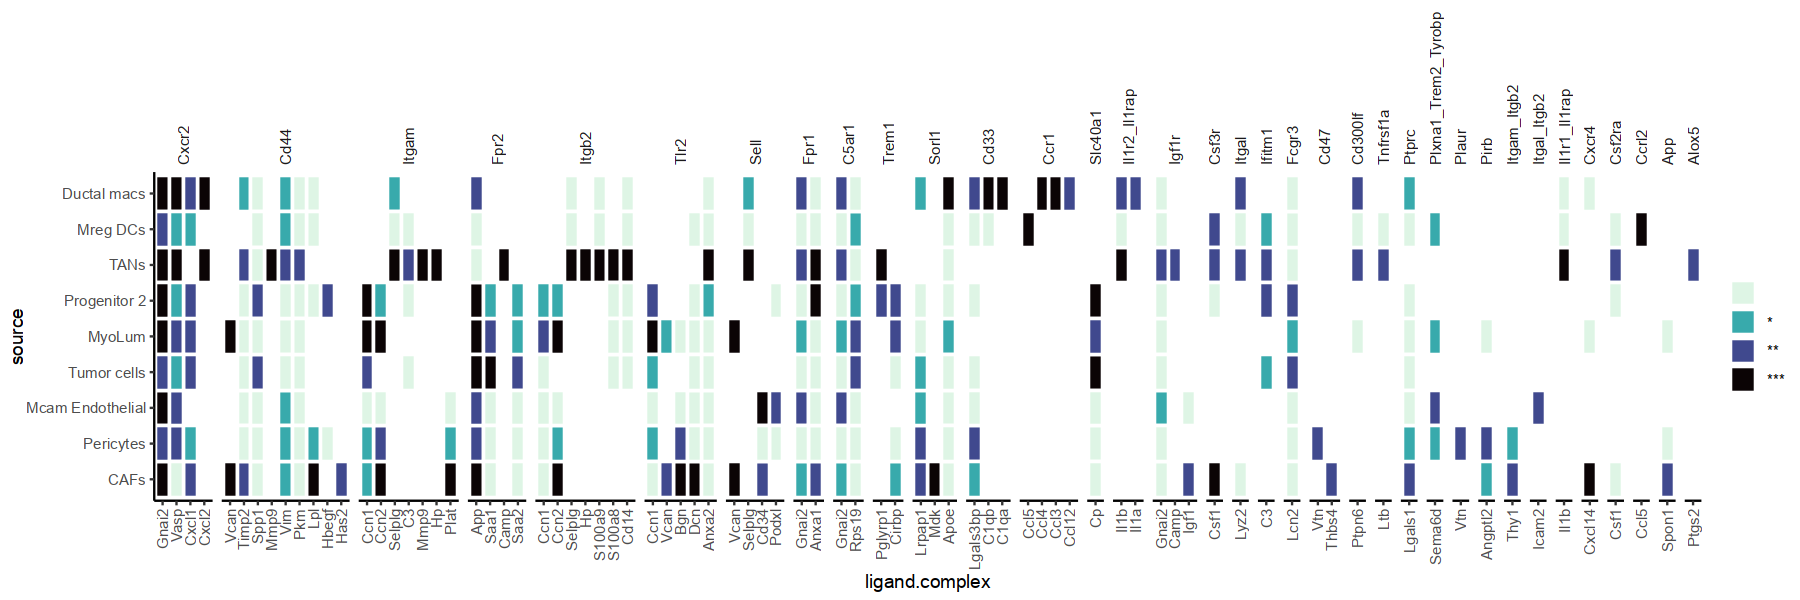

In [575]:
ggplot(plot_df, aes(x=ligand.complex, y=source, fill=ifelse(aggregate_rank < 0.001, '***', 
                                 ifelse(aggregate_rank < 0.01, '**', 
                                        ifelse(aggregate_rank < 0.05, '*', ''))))) +
    geom_tile(color = "white", lwd = 0.75) +
    #geom_text(color="white") +
    facet_grid(~receptor.complex, space='free', scale='free') +
    scale_fill_viridis_d(option="G", direction = -1) +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5), legend.title = element_blank(), strip.background = element_blank(),
          strip.text.x.top = element_text(angle = 90, hjust=0), )

ggsave("final_figs/fig6/TANs_incoming_hm.pdf", width=18, height=3.5)

In [480]:
plot_df = liana_carcinoma %>%
    filter(source == 'TANs__Tumor cells', target %in% c('Ductal macs', 'Mcam Endothelial', 'Pericytes', 'CAFs')) %>%
    group_by(ligand.complex, receptor.complex) %>%
    mutate(min_rank = min(aggregate_rank)) %>% 
    filter(min_rank < 0.05) %>%
    filter(!grepl('Col', ligand.complex)) %>%
    filter(!grepl('Lam', ligand.complex)) %>%
    filter(!grepl('Fn1', ligand.complex)) %>%
    as.data.frame %>%
    mutate(target = factor(target, levels=rev(cell_order)) %>% droplevels)

In [481]:
ligand_order = plot_df %>% 
    filter(aggregate_rank < 0.05) %>%
    group_by(ligand.complex) %>%
    summarise(o=sum(2 ** (source %>% as.numeric))) %>%
    arrange(o) %>%
    select(ligand.complex) %>%
    unlist

In [482]:
receptor_order = plot_df %>% 
    filter(aggregate_rank < 0.05) %>%
    group_by(receptor.complex) %>%
    summarise(o=sum(2 ** (source %>% as.numeric))) %>%
    arrange(o) %>%
    select(receptor.complex) %>%
    unlist

In [483]:
plot_df$ligand.complex = factor(plot_df$ligand.complex, levels=rev(ligand_order))

In [484]:
plot_df$receptor.complex = factor(plot_df$receptor.complex, levels=rev(receptor_order))

In [485]:
options(repr.plot.width = 15, repr.plot.height = 5)

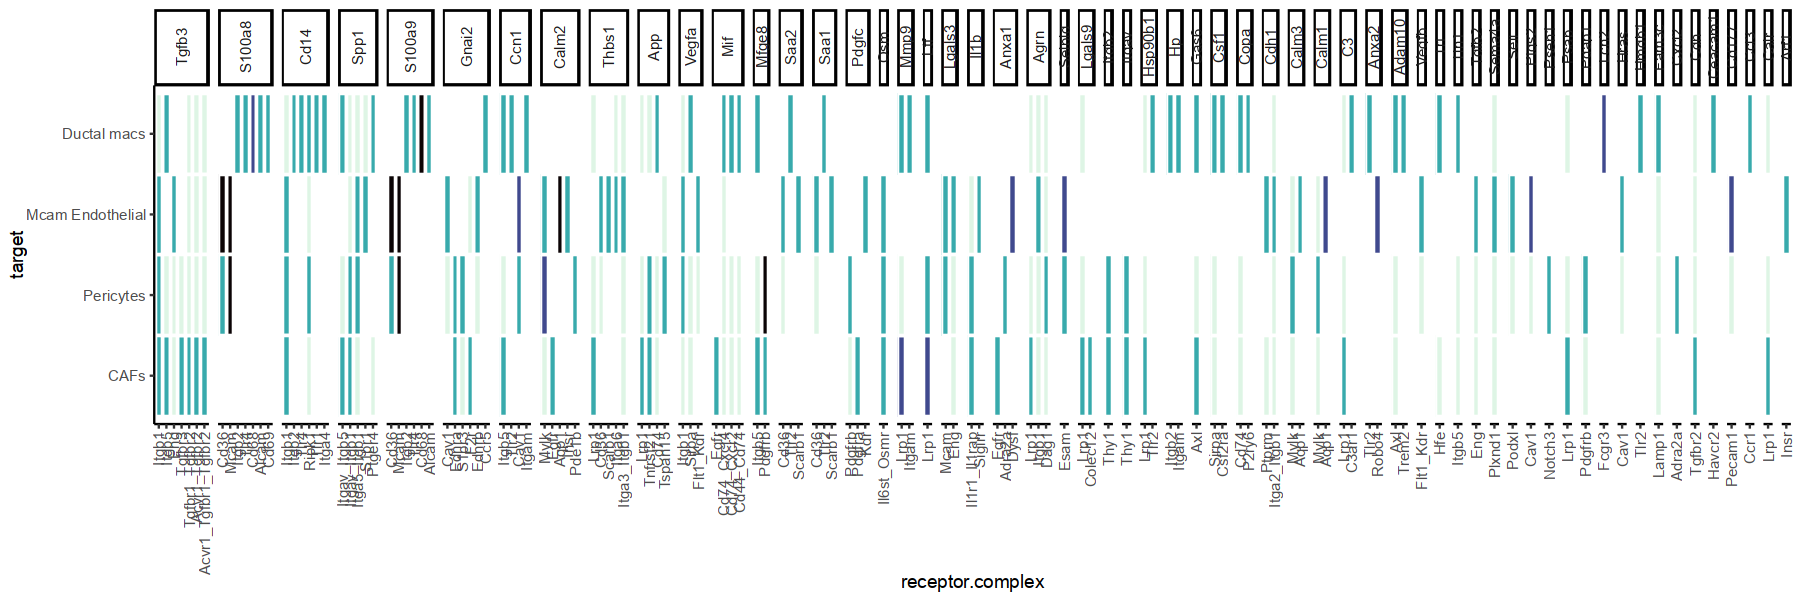

In [486]:
ggplot(plot_df, aes(x=receptor.complex, y=target, fill=ifelse(aggregate_rank < 0.001, '***', 
                                 ifelse(aggregate_rank < 0.01, '**', 
                                        ifelse(aggregate_rank < 0.05, '*', ''))))) +
    geom_tile(color = "white", lwd = 0.75, show.legend = F) +
    #geom_text(color="white") +
    facet_grid(~ligand.complex, space='free', scale='free') +
    scale_fill_viridis_d(option="G", direction = -1) +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5), legend.title = element_blank(),
          strip.text.x.top = element_text(angle = 90))

ggsave("final_figs/fig6/PICs_outgoing_hm.pdf", width=24, height=2.8)

In [487]:
plot_df = liana_carcinoma %>%
    filter(source == 'TANs__Tumor cells', target %in% c('Mcam Endothelial', 'Pericytes')) %>%
    group_by(ligand.complex, receptor.complex) %>%
    mutate(min_rank = min(aggregate_rank)) %>% 
    filter(min_rank < 0.05) %>%
    filter(!grepl('Col', ligand.complex)) %>%
    filter(!grepl('Lam', ligand.complex)) %>%
    filter(!grepl('Fn1', ligand.complex)) %>%
    as.data.frame %>%
    mutate(target = factor(target, levels=rev(cell_order)) %>% droplevels)

In [488]:
ligand_order = plot_df %>% 
    filter(aggregate_rank < 0.05) %>%
    group_by(ligand.complex) %>%
    summarise(o=sum(2 ** (source %>% as.numeric))) %>%
    arrange(o) %>%
    select(ligand.complex) %>%
    unlist

In [489]:
receptor_order = plot_df %>% 
    filter(aggregate_rank < 0.05) %>%
    group_by(receptor.complex) %>%
    summarise(o=sum(2 ** (source %>% as.numeric))) %>%
    arrange(o) %>%
    select(receptor.complex) %>%
    unlist

In [490]:
plot_df$ligand.complex = factor(plot_df$ligand.complex, levels=rev(ligand_order))

In [491]:
plot_df$receptor.complex = factor(plot_df$receptor.complex, levels=rev(receptor_order))

In [492]:
options(repr.plot.width = 15, repr.plot.height = 5)

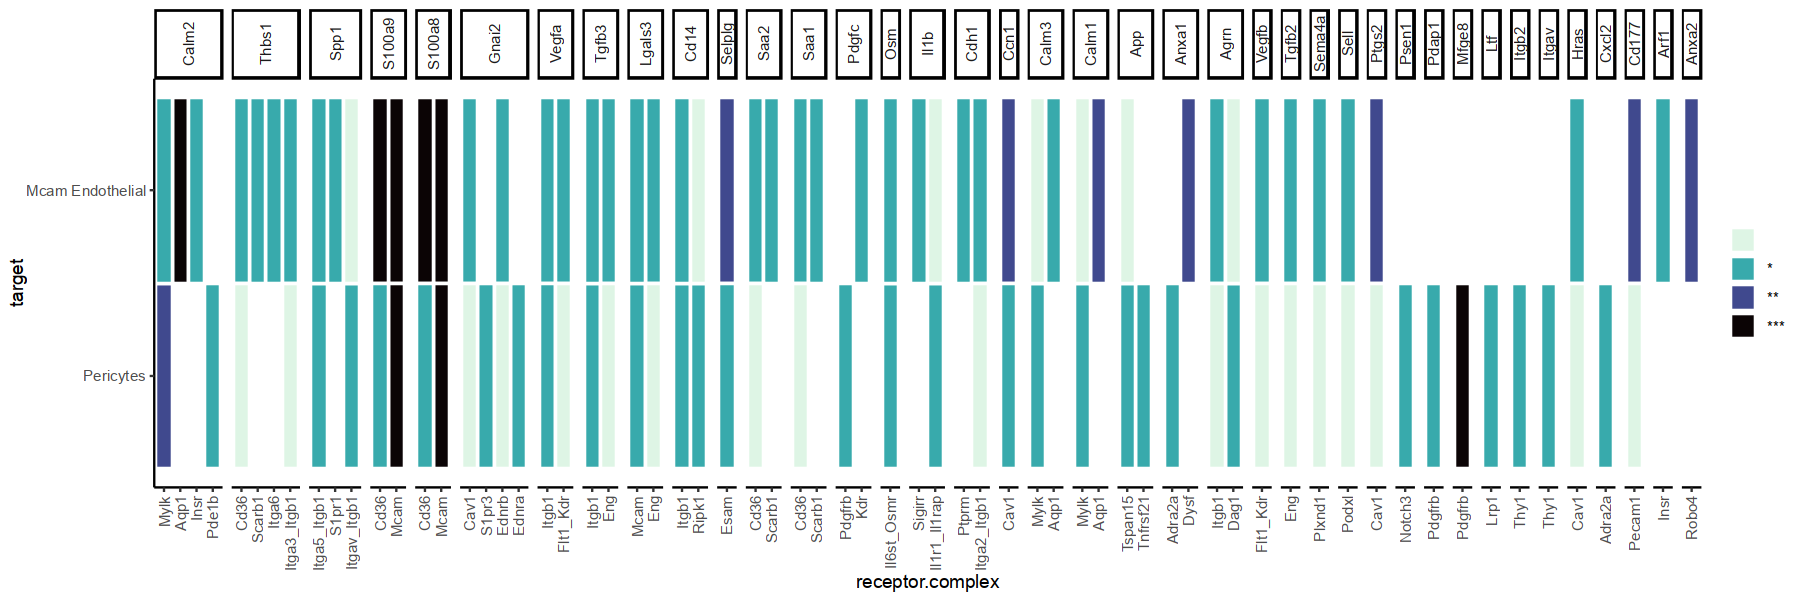

In [497]:
ggplot(plot_df, aes(x=receptor.complex, y=target, fill=ifelse(aggregate_rank < 0.001, '***', 
                                 ifelse(aggregate_rank < 0.01, '**', 
                                        ifelse(aggregate_rank < 0.05, '*', ''))))) +
    geom_tile(color = "white", lwd = 0.75) +
    #geom_text(color="white") +
    facet_grid(~ligand.complex, space='free', scale='free') +
    scale_fill_viridis_d(option="G", direction = -1) +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5), legend.title = element_blank(),
          strip.text.x.top = element_text(angle = 90))

ggsave("final_figs/fig6/PICs_to_perivasc_hm.pdf", width=12, height=1.9)

# Flower plots

In [316]:
cells_cluster = unique(liana_carcinoma$source)

In [321]:
create_circle <- function(center = c(0, 0),
                          npoints = 1000,
                          r = 1,
                          start = 0,
                          end = 2) {
  pts <- seq(start * pi, end * pi, length.out = npoints)
  circle_coords <- data.frame(
    x = center[1] + (r * cos(pts)),
    y = center[2] + (r * sin(pts))
  )

  return(circle_coords)
}

In [322]:
x_ys = create_circle(center = c(0, 0), npoints = length(cells_cluster) - 1, r = 10, start = 0, end = 2) %>% head(-1)

In [323]:
cells_cluster_factor = factor(cells_cluster, levels=c(setdiff(cell_order, c(sinpics, "Progenitor 2")), sinpics, 'Progenitor 2'))

In [324]:
cells_cluster_factor

[1] TANs              CAFs              Mcam Endothelial  Ductal macs      
 [5] Pericytes         Mreg DCs          MyoLum            Tumor cells      
 [9] Progenitor 2      TANs__Tumor cells
35 Levels: T cells CD8 T cells Treg gd NKT NK cells ILC2 B cells ... Progenitor 2

In [325]:
p = ggplot(data.frame(x=0, annot=cells_cluster_factor) %>% filter(annot != "Progenitor 2")) +
    geom_point(aes(x=x, y=annot, fill=annot), pch=21, size=20) +
    scale_fill_manual(values = group.colors)

l = get_legend(p)

ggsave(plot=l, filename = "final_figs/fig6/dot_legend.pdf")

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Saving 6.67 x 6.67 in image


In [326]:
p = ggplot(data.frame(x=0, annot=factor(cells_cluster, levels=cell_order))) +
    geom_point(aes(x=x, y=annot, fill=annot), pch=21, size=10) +
    scale_fill_manual(values = group.colors)

l = get_legend(p)

ggsave(plot=l, filename = "final_figs/fig6/dot_legend_tme.pdf")

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Saving 6.67 x 6.67 in image


In [327]:
cells_cluster_factor

[1] TANs              CAFs              Mcam Endothelial  Ductal macs      
 [5] Pericytes         Mreg DCs          MyoLum            Tumor cells      
 [9] Progenitor 2      TANs__Tumor cells
35 Levels: T cells CD8 T cells Treg gd NKT NK cells ILC2 B cells ... Progenitor 2

In [331]:
cells_cluster_factor[2:6]

[1] CAFs             Mcam Endothelial Ductal macs      Pericytes       
[5] Mreg DCs        
35 Levels: T cells CD8 T cells Treg gd NKT NK cells ILC2 B cells ... Progenitor 2

In [332]:
other_pops = cells_cluster_factor[c(2:6)] %>% sort

In [333]:
other_pops

[1] Ductal macs      Mreg DCs         Mcam Endothelial Pericytes       
[5] CAFs            
35 Levels: T cells CD8 T cells Treg gd NKT NK cells ILC2 B cells ... Progenitor 2

In [430]:
focus_pop = 'TANs__Tumor cells'

counts_df = liana_carcinoma %>% 
    filter(aggregate_rank < 0.05) %>%
    #filter(xor(source == focus_pop, target == focus_pop)) %>%
    filter(source == focus_pop) %>%
    group_by(source, target) %>%
    summarise(count=n())

#other_pops = setdiff(union(counts_df$source, counts_df$target), 'TANs__Tumor cells')

x_ys = create_circle(center = c(0, 0),
                     npoints = length(other_pops) + 1, 
                     r = 10, 
                     start = 0, 
                     end = 2) %>%
    head(-1)
base_dot_df = cbind(x_ys, cell=rev(other_pops))

dot_df = base_dot_df %>% 
    rbind(data.frame(x=c(-0.75, 0.75), y=c(0, 0), cell=unlist(str_split(focus_pop, "__"))))

dot_dict = dot_df %>% 
    head(-2) %>% 
    rbind(data.frame(x=0, y=0, cell=focus_pop)) %>% 
    column_to_rownames('cell')

arrow_df = counts_df
arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x'] 
arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 2 / arrow_df$distance
arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 1.25 / arrow_df$distance 
arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=20, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            scale_color_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank()) + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, color=source, fill=NA), 
                       linewidth=3,
                       #linewidth=count),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")), show.legend=F)

ggsave("final_figs/fig6/PIC_outgoing_arrows.pdf", plot=p, width=8, height=8)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_curve()`).”


In [431]:
counts_df

source,target,count
<fct>,<fct>,<int>
TANs__Tumor cells,Ductal macs,51
TANs__Tumor cells,Mreg DCs,7
TANs__Tumor cells,TANs,24
TANs__Tumor cells,Progenitor 2,1
TANs__Tumor cells,MyoLum,13
TANs__Tumor cells,Tumor cells,2
TANs__Tumor cells,Mcam Endothelial,53
TANs__Tumor cells,Pericytes,33
TANs__Tumor cells,CAFs,38


In [432]:
focus_pop = 'TANs__Tumor cells'

counts_df = liana_carcinoma %>% 
    filter(aggregate_rank < 0.05) %>%
    #filter(xor(source == focus_pop, target == focus_pop)) %>%
    filter(target == focus_pop) %>%
    group_by(source, target) %>%
    summarise(count=n())

#other_pops = setdiff(union(counts_df$source, counts_df$target), 'TANs__Tumor cells')

x_ys = create_circle(center = c(0, 0),
                     npoints = length(other_pops) + 1, 
                     r = 10, 
                     start = 0, 
                     end = 2) %>%
    head(-1)
base_dot_df = cbind(x_ys, cell=rev(other_pops))

dot_df = base_dot_df %>% 
    rbind(data.frame(x=c(-0.75, 0.75), y=c(0, 0), cell=unlist(str_split(focus_pop, "__"))))

dot_dict = dot_df %>% 
    head(-2) %>% 
    rbind(data.frame(x=0, y=0, cell=focus_pop)) %>% 
    column_to_rownames('cell')

arrow_df = counts_df
arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x']
arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 1.25 / arrow_df$distance
arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 2 / arrow_df$distance 
arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=20, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            scale_color_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank()) + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, color=source, fill=NA), 
                       linewidth=3,
                       #linewidth=count),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")), show.legend=F)

ggsave("final_figs/fig6/PIC_incoming_arrows.pdf", plot=p, width=8, height=8)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_curve()`).”


In [433]:
counts_df

source,target,count
<fct>,<fct>,<int>
Ductal macs,TANs__Tumor cells,23
Mreg DCs,TANs__Tumor cells,8
TANs,TANs__Tumor cells,17
Progenitor 2,TANs__Tumor cells,12
MyoLum,TANs__Tumor cells,34
Tumor cells,TANs__Tumor cells,17
Mcam Endothelial,TANs__Tumor cells,55
Pericytes,TANs__Tumor cells,71
CAFs,TANs__Tumor cells,175


In [340]:
other_pops = cells_cluster_factor[c(2:6)] %>% sort

In [341]:
other_pops

[1] Ductal macs      Mreg DCs         Mcam Endothelial Pericytes       
[5] CAFs            
35 Levels: T cells CD8 T cells Treg gd NKT NK cells ILC2 B cells ... Progenitor 2

In [434]:
focus_pop = 'TANs'

counts_df = liana_carcinoma %>% 
    filter(aggregate_rank < 0.05) %>%
    #filter(xor(source == focus_pop, target == focus_pop)) %>%
    filter(target == focus_pop) %>%
    group_by(source, target) %>%
    summarise(count=n())

#other_pops = setdiff(union(counts_df$source, counts_df$target), focus_pop)

x_ys = create_circle(center = c(0, 0),
                     npoints = length(other_pops) + 1, 
                     r = 10, 
                     start = 0, 
                     end = 2) %>%
    head(-1)
base_dot_df = cbind(x_ys, cell=rev(other_pops))

dot_df = base_dot_df %>% 
    rbind(data.frame(x=c(0), y=c(0), cell=unlist(str_split(focus_pop, "__"))))

dot_dict = dot_df %>% 
    head(-1) %>% 
    rbind(data.frame(x=0, y=0, cell=focus_pop)) %>% 
    column_to_rownames('cell')

arrow_df = counts_df
arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x']
arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 1.25 / arrow_df$distance
arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 1.25 / arrow_df$distance 
arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=20, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            scale_color_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank()) + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, color=source, fill=NA), 
                       linewidth=3,
                       #linewidth=count),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")), show.legend=F)

ggsave("final_figs/fig6/TAN_incoming_arrows.pdf", plot=p, width=8, height=8)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_curve()`).”


In [435]:
counts_df

source,target,count
<fct>,<fct>,<int>
Ductal macs,TANs,34
Mreg DCs,TANs,10
TANs,TANs,34
Progenitor 2,TANs,27
MyoLum,TANs,37
Tumor cells,TANs,18
Mcam Endothelial,TANs,24
Pericytes,TANs,38
CAFs,TANs,55


In [344]:
focus_pop = 'TANs'

counts_df = liana_carcinoma %>% 
    filter(aggregate_rank < 0.05) %>%
    #filter(xor(source == focus_pop, target == focus_pop)) %>%
    filter(source == focus_pop) %>%
    group_by(source, target) %>%
    summarise(count=n())

#other_pops = setdiff(union(counts_df$source, counts_df$target), focus_pop)

x_ys = create_circle(center = c(0, 0),
                     npoints = length(other_pops) + 1, 
                     r = 10, 
                     start = 0, 
                     end = 2) %>%
    head(-1)
base_dot_df = cbind(x_ys, cell=rev(other_pops))

dot_df = base_dot_df %>% 
    rbind(data.frame(x=c(0), y=c(0), cell=unlist(str_split(focus_pop, "__"))))

dot_dict = dot_df %>% 
    head(-1) %>% 
    rbind(data.frame(x=0, y=0, cell=focus_pop)) %>% 
    column_to_rownames('cell')

arrow_df = counts_df
arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x']
arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 1.25 / arrow_df$distance
arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 1.25 / arrow_df$distance 
arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=20, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            scale_color_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank()) + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, color=source, fill=NA), 
                       linewidth=3,
                       #linewidth=count),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")), show.legend=F)

ggsave("final_figs/fig6/TAN_outgoing_arrows.pdf", plot=p, width=8, height=8)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_curve()`).”


In [345]:
counts_df

source,target,count
<fct>,<fct>,<int>
TANs,Ductal macs,66
TANs,Mreg DCs,13
TANs,TANs,34
TANs,Progenitor 2,6
TANs,MyoLum,6
TANs,Tumor cells,21
TANs,Mcam Endothelial,34
TANs,Pericytes,30
TANs,CAFs,25


Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_curve()`).”


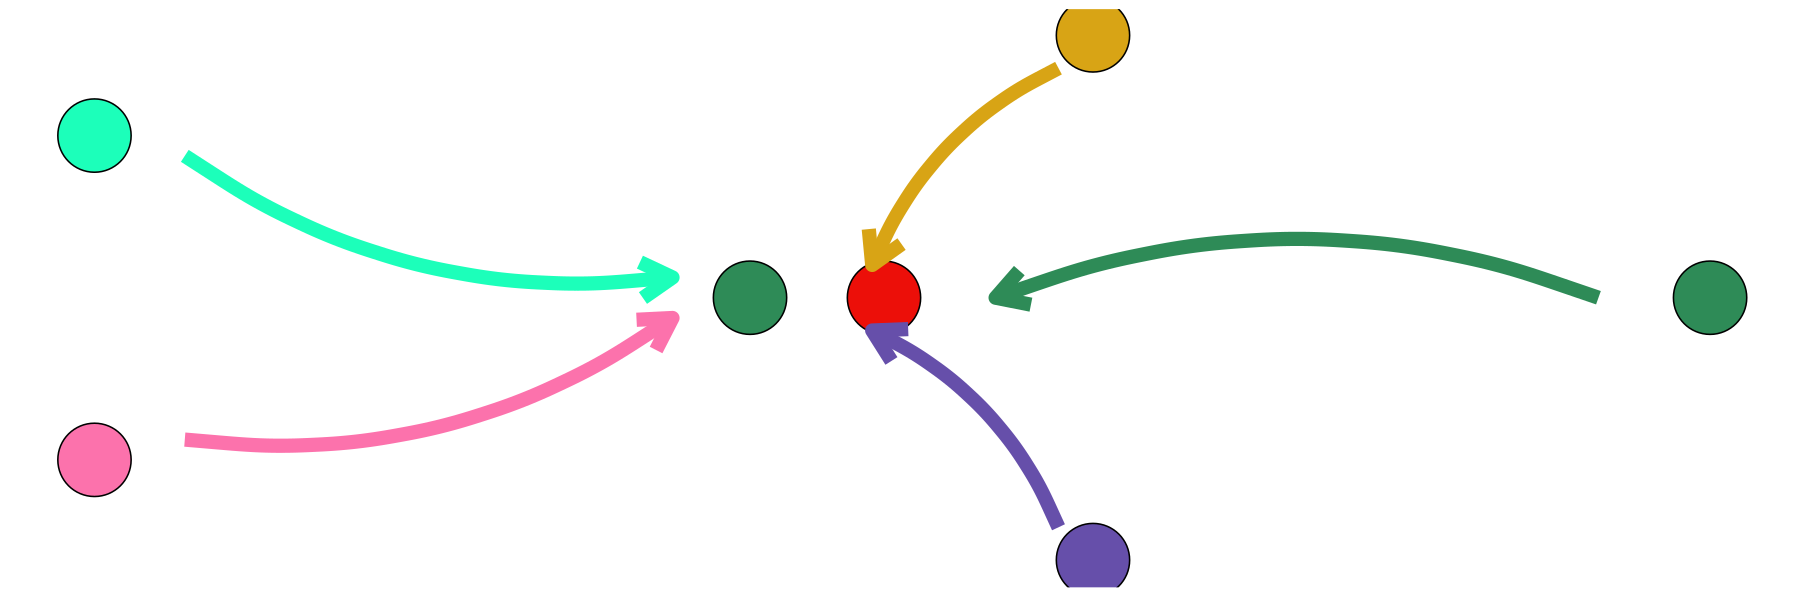

In [152]:
p

In [153]:
.get_freq <- function(liana_res){
    liana_res %>%
        group_by(source, target) %>%
        summarise(freq = n(), .groups = 'keep') %>%
        pivot_wider(id_cols = source,
                    names_from = target,
                    values_from = freq,
                    values_fill = 0) %>%
        arrange(source) %>%
        ungroup() %>%
        as.data.frame() %>%
        column_to_rownames('source') %>%
        as.matrix()
}

In [154]:
create_arrow_plot = function(partners, df_name, arrow_df, dot_df, dot_dict, plot_type, basedir="final_figs/fig6/arrows/", 
                             to_save=F){
    
    arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x']
    arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
    arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
    arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
    arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
    arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 1.25 / arrow_df$distance
    arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 1.25 / arrow_df$distance 
    arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
    arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

    if (plot_type == "singlet"){
        arrow_df$color = ifelse(arrow_df$source %in% partners,
                                group.colors[arrow_df$source],
                                group.colors[arrow_df$target])
    }else if (plot_type == "pic"){
        arrow_df$color = 'slategray'
    } else if (plot_type == "upnew"){
        arrow_df$color = type_colors[arrow_df$interaction_type]
    }

    p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=10, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank())
    
    if (plot_type == "upnew"){
        p = p + 
            geom_curve(curvature = 0.2, size=3,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["De novo"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'De novo'), 
                       arrow = arrow(length = unit(0.1, "in"))) + 
            geom_curve(curvature = 0, size=3,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["Both"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'Both'), 
                       arrow = arrow(length = unit(0.1, "in"))) + 
            geom_curve(curvature = -0.2, size=3,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["Upregulated"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'Upregulated'), 
                       arrow = arrow(length = unit(0.1, "in"))) +
            geom_label(aes(x=(x1 + x2) / 2, y = (y1 + y2) / 2, label=count), inherit.aes=F,
                      data = arrow_df %>% group_by(x1, x2, y1, y2) %>% summarise(count=sum(count)))
    } else {
        p = p + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       size=log1p(count), color=color, fill=NA),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")))
    }
    
    if (to_save){
        ggsave(plot = p, filename = paste0(basedir, df_name, ".pdf"))
    }
    return(p)
}

In [155]:
focus_pop = 'TANs__Tumor cells'
counts_df = liana_carcinoma %>% 
    filter(aggregate_rank < 0.05) %>%
    filter(source == focus_pop | target == focus_pop) %>%
    group_by(source, target) %>%
    summarise(count=n())

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.


In [ ]:
out_counts_df = liana_carcinoma %>% 
    filter(source == pics & target %in% other_pops & cellphonedb.pvalue < max_rank) %>%
    group_by(target, ligand.complex, receptor.complex) %>%
    mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
           is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
    mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])


In [ ]:
create_arrow_plot('TANs__Tumor cells', "PICs", arrow_df, dot_df, dot_dict, plot_type)

In [440]:
arrow_plots = function(pic, liana_carcinoma, other_pops=cells_cluster, to_save=T, basedir="final_figs/fig6/arrows/", 
                       max_rank=0.05){
    
    # General preperations
    if(!dir.exists(basedir)){dir.create(basedir)}
    partners = str_split(pic, "__") %>% unlist
    other_pops = setdiff(other_pops, partners)
    
    x_ys = create_circle(center = c(0, 0),
                         npoints = length(other_pops) + 1, 
                         r = 10, 
                         start = 0, 
                         end = 2) %>%
        head(-1)
    base_dot_df = cbind(x_ys, cell=rev(other_pops))
    
    # Build PIC dotplot    
    pic_dot_df = base_dot_df %>% 
        rbind(data.frame(x=c(-0.5, 0.5), y=c(0, 0), cell=partners))
    pic_dot_dict = pic_dot_df %>% 
        head(-2) %>% 
        rbind(data.frame(x=0, y=0, cell=pic)) %>% 
        column_to_rownames('cell')
    
    # Build singlets dotplot
    singlet_dot_df = base_dot_df %>%
        rbind(data.frame(x=c(-3, 3), y=c(0, 0), cell=partners))
    singlet_dot_dict = singlet_dot_df %>%
        column_to_rownames('cell')
    
    # Outgoing DFs    
    out_counts_df = liana_carcinoma %>% 
        filter(source %in% c(pic, partners) & target %in% other_pops & cellphonedb.pvalue < max_rank) %>%
        group_by(target, ligand.complex, receptor.complex) %>%
        mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
               is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
        mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])
    if (to_save){write.csv(out_counts_df, paste0(basedir, "out_interactions.csv"), row.names=F)}

    out_singlet_arrow_df = out_counts_df %>%
        filter(source %in% partners) %>%
        group_by(source, target) %>%
        summarise(count=n())
    out_pic_arrow_df = out_counts_df %>%
        filter(source == pic) %>%
        group_by(source, target) %>%
        summarise(count=n())
    out_upnew_arrow_df = out_counts_df %>%
        filter(source == pic & interaction_type != "Normal") %>%
        group_by(source, target, interaction_type) %>%
        summarise(count=n())

        # Incoming DFs    
    in_counts_df = liana_carcinoma %>% 
        filter(target %in% c(pic, partners) & source %in% other_pops & cellphonedb.pvalue < max_rank) %>%
        group_by(source, ligand.complex, receptor.complex) %>%
        mutate(is_up = ifelse(target == pic & any(unlist(str_split(receptor.complex, "_")) %in% upgenes), 1, 0),
               is_denovo = ifelse(target == pic & n() == 1, 2, 0)) %>%
        mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])
    if (to_save){write.csv(in_counts_df, paste0(basedir, "in_interactions.csv"), row.names=F)}
    in_singlet_arrow_df = in_counts_df %>%
        filter(target %in% partners) %>%
        group_by(source, target) %>%
        summarise(count=n())
    in_pic_arrow_df = in_counts_df %>%
        filter(target == pic) %>%
        group_by(source, target) %>%
        summarise(count=n())
    in_upnew_arrow_df = in_counts_df %>%
        filter(target == pic & interaction_type != "Normal") %>%
        group_by(source, target, interaction_type) %>%
        summarise(count=n())
    
    arrow_dfs = list(out_singlet=out_singlet_arrow_df,
                     out_pic=out_pic_arrow_df,
                     out_upnew=out_upnew_arrow_df,
                     in_singlet=in_singlet_arrow_df,
                     in_pic=in_pic_arrow_df,
                     in_upnew=in_upnew_arrow_df)
        
    arrow_plots = lapply(names(arrow_dfs), function(df_name){
        arrow_df = arrow_dfs[[df_name]]
        plot_type = unlist(str_split(df_name, "_"))[2]
        if (plot_type == "singlet"){
            dot_df = singlet_dot_df
            dot_dict = singlet_dot_dict
        } else {
            dot_df = pic_dot_df
            dot_dict = pic_dot_dict
        }
        p = create_arrow_plot(partners, df_name, arrow_df, dot_df, dot_dict, plot_type, basedir=basedir, to_save=to_save)
        return(p)
    })
    
    return(arrow_plots)
}

In [567]:
ap_plots = arrow_plots("TANs__Tumor cells", liana_carcinoma, other_pops = cells_cluster, max_rank = 0.05)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source', 'target'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source', 'target'. You can override using
the `.groups` argument.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Saving 6.67 x 6.67 in image
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Saving 6.67 x 6.67 in image
Warning message in geom_curve(curvature = 0.2, size = 3, aes(x = x1_fixed, y = y1_fixed, :
“Ignori

In [280]:
pic = "TANs__Tumor cells"
other_pops = cells_cluster
max_rank = 0.05
partners = str_split(pic, "__") %>% unlist

other_pops = setdiff(other_pops, partners)
out_counts_df = liana_carcinoma %>% 
    filter(source %in% c(pic, partners) & target %in% other_pops & cellphonedb.pvalue < max_rank) %>%
    group_by(target, ligand.complex, receptor.complex) %>%
    mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
           is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
    mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])


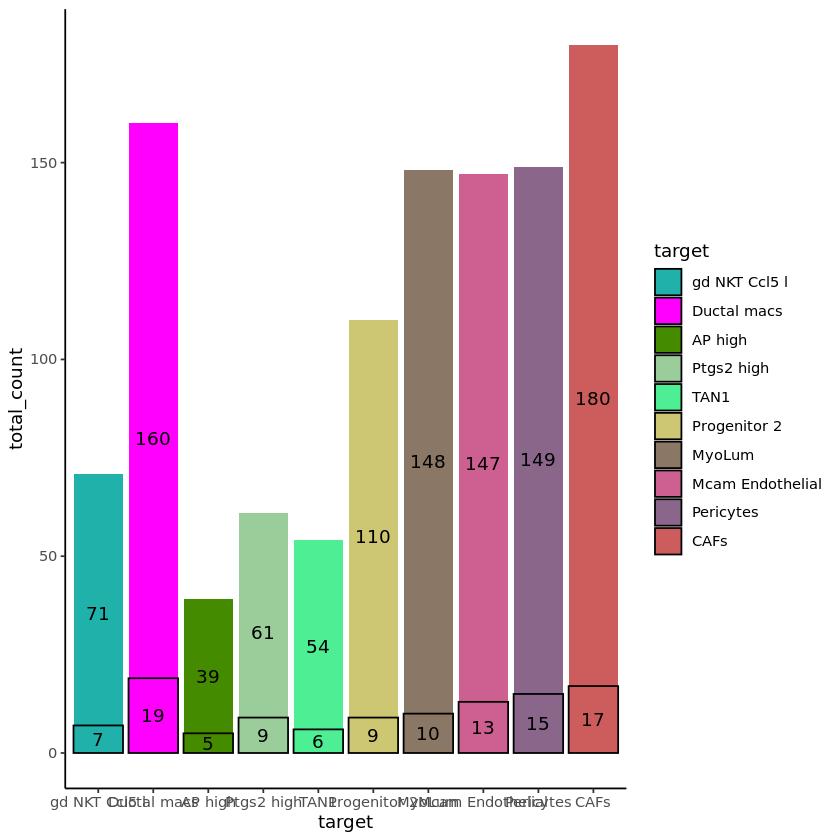

In [294]:
out_counts_df %>%
    filter(source == pic) %>%
    group_by(target) %>%
    summarise(total_count = n(), induced = sum(interaction_type != "Normal"), pct=induced / total_count) %>%
    ggplot(aes(x=target, y=total_count, fill=target)) +
    geom_bar(stat='identity') +
    geom_bar(stat='identity', aes(y=induced), color='black') +
    geom_text(aes(y = total_count / 2, label=total_count)) +
    geom_text(aes(y = induced / 2, label=induced)) +
    scale_fill_manual(values = group.colors)

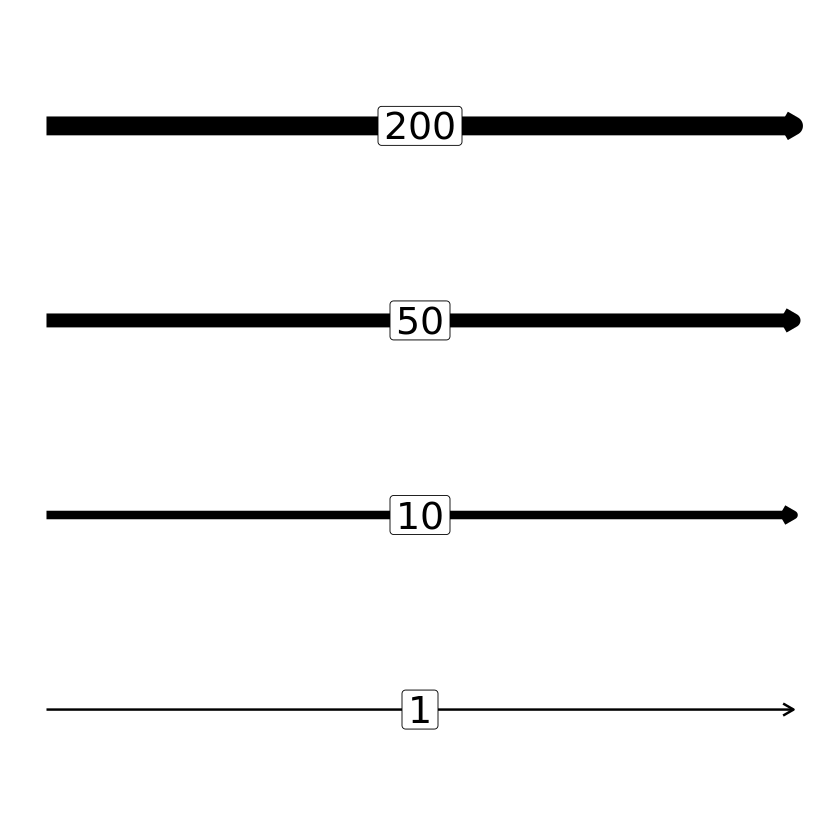

In [246]:
data.frame(x=rep(1, 4), y=1:4, size=log1p(c(1, 10, 50, 200)), xend=rep(3, 4), yend=1:4, label=c(1, 10, 50, 200)) %>%
    ggplot(aes(x = x, xend = xend, y=y, yend = yend, size=size, label=label)) +
    geom_segment(arrow = arrow(length = unit(0.1, "in"))) +
    scale_size_identity() +  
    scale_y_discrete() +
    geom_label(x=2, size=8) +
    theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
          axis.ticks = element_blank(), 
          axis.line = element_blank(), 
          axis.title = element_blank(), 
          axis.text = element_blank())
ggsave("final_figs/fig6/arrows/arrow_legend.pdf", width = 2, height=3)

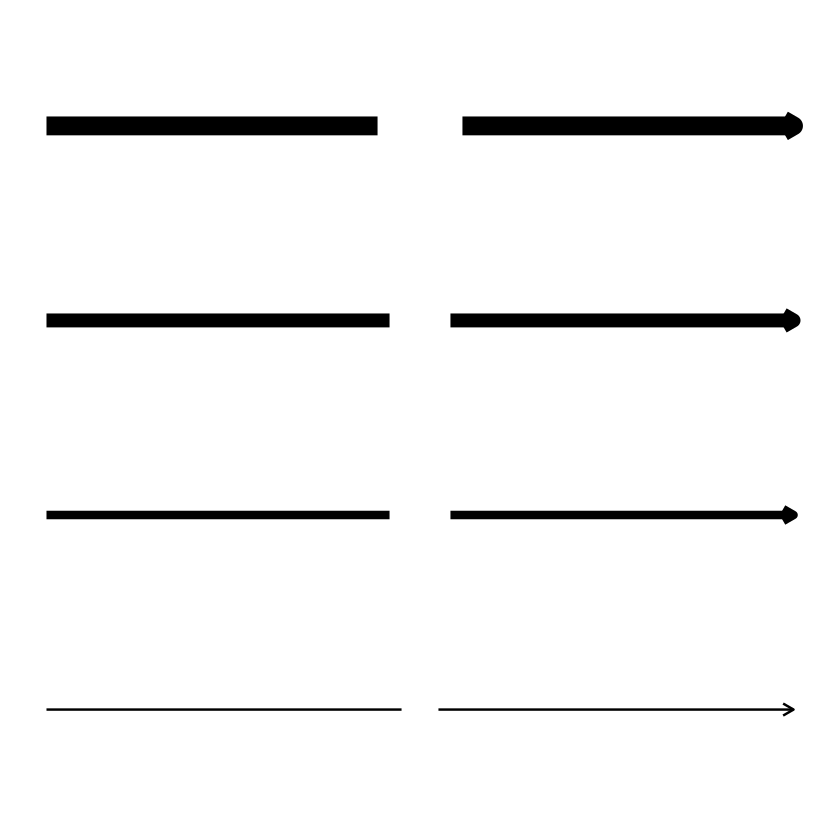

In [341]:
data.frame(x=rep(1, 4), y=1:4, size=log1p(c(1, 10, 50, 200)), xend=rep(3, 4), yend=1:4, label=c(1, 10, 50, 200)) %>%
    ggplot(aes(x = x, xend = xend, y=y, yend = yend, size=size, label=label)) +
    geom_segment(arrow = arrow(length = unit(0.1, "in"))) +
    scale_size_identity() +  
    scale_y_discrete() +
    geom_label(x=2, size=8, color='white') +
    theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
          axis.ticks = element_blank(), 
          axis.line = element_blank(), 
          axis.title = element_blank(), 
          axis.text = element_blank())
ggsave("final_figs/fig6/arrows/arrow_legend_blank.pdf", width = 2, height=3)

# Dotplots

In [247]:
mc_kinetics = scdb_mc("kinetics_mc")

In [248]:
mc_neutrophil = scdb_mc("neutrophil_mc")

In [249]:
all_mat = t(mat@mat)
all_mat = all_mat[colnames(sce),]
norm_mat = log1p(1e4 * all_mat / rowSums(all_mat))

In [250]:
norm_mat_df = data.frame(norm_mat, annot=sce$annots) %>% 
    melt(id.vars = 'annot', variable.name = 'Gene', value.name = 'LogNormExpr')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.2 GiB”


In [253]:
pct_expr = norm_mat_df %>%
    group_by(annot, Gene) %>%
    summarise(pct_expression = sum(LogNormExpr > 0) / n()) %>%
    dcast(annot ~ Gene)

`summarise()` has grouped output by 'annot'. You can override using the
`.groups` argument.
Using pct_expression as value column: use value.var to override.



In [254]:
pct_expr = pct_expr %>% column_to_rownames('annot')

In [255]:
pct_expr['TANs__Tumor cells',c('Cxcl2')] %>% unlist %>% mean

[1] 0.494186

In [417]:
-log10(0.001) + 1

[1] 4

In [436]:
dotplot_plot = function(other, pic='TANs__Tumor cells', direction='OUT', basedir="final_figs/fig6/dotplots_agg/",
                        min_fraction=0.1, only_induced=T, sig_thresh=0.05, suffix=""){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    focus_liana = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% other) %>% 
        mutate(lr = paste(ligand.complex, receptor.complex, sep=' -> ')) %>%
        group_by(lr) %>%
        mutate(min_pval = min(aggregate_rank)) %>%
        filter(min_pval < sig_thresh)

    upnew_interactions = focus_liana %>%
        filter(aggregate_rank < sig_thresh) %>%
        group_by(lr) %>%
        mutate(is_up = ifelse(focus_cell == pic & any(unlist(str_split(focus_gene, "_")) %in% upgenes), 2, 0),
               is_denovo = ifelse(focus_cell == pic & n() == 1, 1, 0)) %>%
        filter(focus_cell == pic) %>%
        mutate(interaction_type = factor(names(type_colors)[1 + is_up + is_denovo], levels=names(type_colors))) %>%
        filter(pct_expr[pic, unlist(str_split(focus_gene, "_"))] %>% unlist %>% mean > min_fraction) %>%
        column_to_rownames('lr')
    
    if (only_induced){
        upnew_interactions = upnew_interactions %>% filter(interaction_type != 'Normal')
    }
    
    if (nrow(upnew_interactions) == 0){
        message("couldn't find interactions with ", sig_thresh)
        return()
    }
    
    upnew_full_tbl = focus_liana %>%
        filter(lr %in% rownames(upnew_interactions)) %>%
        mutate(focus_cell = factor(focus_cell, levels = c(partners, pic)),
               interaction_type = upnew_interactions[lr, 'interaction_type'],
               aggregate_rank = ifelse(aggregate_rank < 0.001, 0.001, aggregate_rank))

    p = ggplot(upnew_full_tbl, aes(x=lr, y=focus_cell, size=-log10(aggregate_rank))) +
        geom_point(color=group.colors[other]) +
        geom_tile(inherit.aes = F, aes(x=lr, y=0, fill=interaction_type), height=0.25) +
        labs(title = paste(other, direction)) +
        scale_y_discrete(drop=F) +
        scale_size_continuous(limits=c(0,3), range = c(1, 8)) +
        facet_grid(~ interaction_type, space = 'free_x', scales='free_x') +
        scale_fill_manual(values = type_colors) +
        theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5, size=6), axis.text.y = element_text(size=6),
              axis.title.x = element_blank(), axis.title.y = element_blank(), plot.title = element_text(size=12, hjust=0.5))
    
    upnew_full_tbl[c('lr','interaction_type')] %>% 
        unique %>% 
        arrange(interaction_type, lr) %>% 
        as.data.frame %>%
        select(lr) %>%
        unlist %>%
        write_lines(file = paste0(basedir, other, "_", direction, suffix, "_names.txt"))

    l = get_legend(p)
    p = plot_grid(p + theme(legend.position="none"))

    ggsave(plot=p, filename=paste0(basedir, other, "_", direction, suffix, ".pdf"), height=3, width=8)
    ggsave(plot=l, filename=paste0(basedir, other, "_", direction, suffix, "_legend.pdf"), height=8, 
           width=3)
}

In [437]:
for (pop in c('Mcam Endothelial', 'Ductal macs', 'Pericytes', 'CAFs', 'TANs', 'Endothelial')){
    message(pop, "...")
    for (direction in c('IN', 'OUT')){
        message("\t", direction)
        dotplot_plot(pop, direction = direction)
        dotplot_plot(pop, only_induced=F, direction = direction, suffix="_all")
        dotplot_plot(pop, sig_thresh=0.01, direction = direction, suffix="_01")
        dotplot_plot(pop, sig_thresh=0.01, only_induced=F, direction = direction, suffix="_01_all")
    }
}

Mcam Endothelial...

	IN

	OUT

Ductal macs...

	IN

couldn't find interactions with 0.01

	OUT

couldn't find interactions with 0.01

Pericytes...

	IN

couldn't find interactions with 0.01

	OUT

CAFs...

	IN

	OUT

couldn't find interactions with 0.01

TANs...

	IN

	OUT

Endothelial...

	IN

	OUT



In [430]:
for (pop in c('CAFs')){
    message(pop, "...")
    for (direction in c('IN')){
        message("\t", direction)
        dotplot_plot(pop, sig_thresh=0.001, direction = direction, suffix="_001")
        dotplot_plot(pop, sig_thresh=0.001, only_induced=F, direction = direction, suffix="_001_all")
    }
}

CAFs...

	IN

couldn't find interactions with 0.001



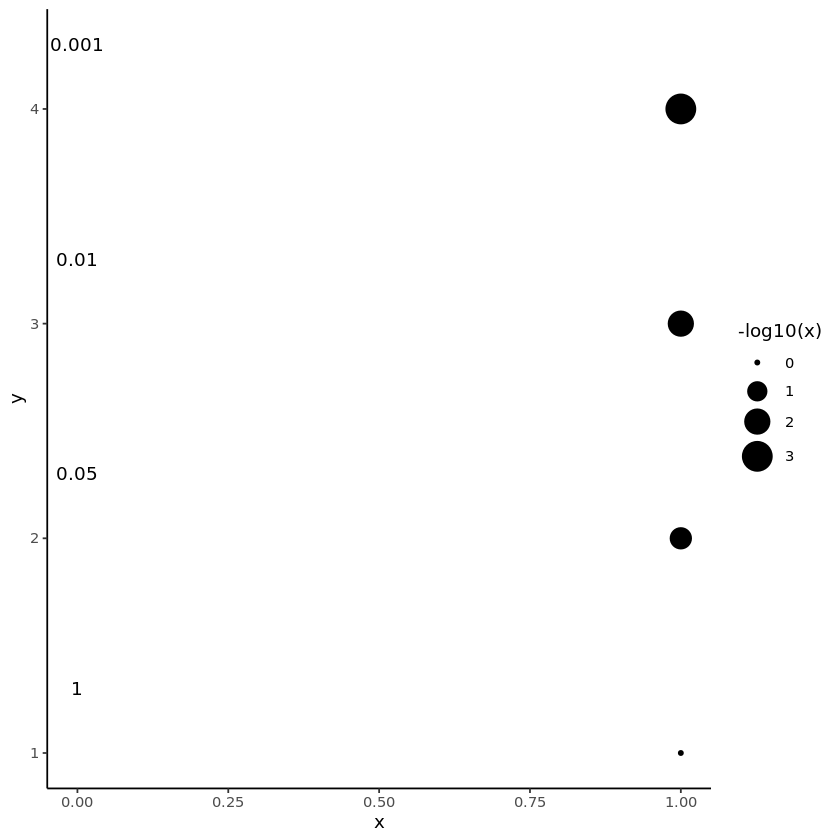

In [435]:
data.frame(x=c(1, 0.05, 0.01, 0.001), y=1:4) %>%
    ggplot(aes(x=1, y=y, size=-log10(x))) +
    geom_point() +
    geom_text(aes(x=0,y=y + 0.3,label=x), inherit.aes = F) +
    scale_size_continuous(limits=c(0,3), range = c(1, 8))
ggsave("final_figs/fig6/dotplot_legend.pdf", height=3, width=5)

In [386]:
p = c('Normal', 'De novo', 'Upregulated', 'Both') %>%
data.frame(x=factor(., levels=.)) %>%
    ggplot(aes(x=x, y=1, fill=x)) +
    geom_bar(stat='identity') +
    scale_fill_manual(values = type_colors) 
l = get_legend(p)
ggsave("final_figs/fig6/dotplot_line_legend.pdf", l)

Saving 6.67 x 6.67 in image


# Gene barplots

In [436]:
mc_kinetics = scdb_mc("kinetics_mc")

In [437]:
mc_neutrophil = scdb_mc("neutrophil_mc")

In [438]:
all_mat = t(mat@mat)
all_mat = all_mat[colnames(sce),]
norm_mat = log1p(1e4 * all_mat / rowSums(all_mat))

In [439]:
norm_mat_df = data.frame(norm_mat, annot=sce$annots) %>% 
    melt(id.vars = 'annot', variable.name = 'Gene', value.name = 'LogNormExpr')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.6 GiB”


In [440]:
plot_bar_per_pop = function(gene, pops){
    if (grepl("_", gene)){
        plot_df = data.frame(norm_mat[,str_split(gene, "_") %>% unlist], annot=factor(sce$annots, levels=pops)) %>% 
            melt(variable.name = 'gene', value.name = 'LogNormExpr')
    } else {
        plot_df = data.frame(gene=gene, LogNormExpr=norm_mat[,gene], annot=factor(sce$annots, levels=pops))
    }
    plot_df = plot_df %>% filter(annot %in% pops) %>% mutate(annot = factor(annot, levels=cell_order))
    p = ggplot(plot_df, aes(x=annot, y=LogNormExpr, fill=annot)) +
        stat_summary(fun = mean, geom = 'bar', color='black', show.legend=F) +
        stat_summary(fun.data = mean_se, geom='errorbar', width=0.2) +
        scale_fill_manual(values=group.colors) +
        geom_hline(yintercept = 0) +
        labs(title = gene) +
        theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(),
              axis.line.x = element_blank(), axis.text.y = element_text(size=8), axis.title.y = element_blank(), 
              plot.title = element_text(hjust=0.5, size=12))
    if (grepl("_", gene)){
        p + facet_grid(~ gene)
    }

}


In [441]:
barplot_interactions = function(other_name, others, pic='TANs__Tumor cells', direction='OUT',
                                basedir="final_figs/fig6/barplots/"){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    interaction_df = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% others & aggregate_rank < 0.05)
    
    dirname = paste0(basedir, other_name, "_", direction)
    if (!dir.exists(dirname)) {dir.create(dirname)}
    for (gene_a in interaction_df$focus_gene %>% unique){
        gene_dir = paste0(dirname, "/", gene_a, "/")
        if (!dir.exists(gene_dir)) {dir.create(gene_dir)}
        p = plot_bar_per_pop(gene_a, c(partners, pic))
        ggsave(paste0(gene_dir, gene_a, ".pdf"), height=3, width=1.6)
            ggsave(paste0(gene_dir, gene_a, "_noaxis.pdf"), plot = p + theme(axis.text.y = element_blank()),
                   height=3, width=1.6)
        
        other_genes = interaction_df[interaction_df$focus_gene == gene_a,'other_gene'] %>% unlist %>% unique
        for (gene_b in other_genes){
            p = plot_bar_per_pop(gene_b, others)
            ggsave(paste0(gene_dir, gene_b, ".pdf"), height=3, width=0.1 + (0.5 * length(others) * (1 + grepl("_", gene_b))))
            ggsave(paste0(gene_dir, gene_b, "_noaxis.pdf"), plot = p + theme(axis.text.y = element_blank()),
                   height=3, width=0.1 + (0.5 * length(others)))
        }
    }
}

In [442]:
barplot_interactions("four_pops", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes'))

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as

In [531]:
barplot_interactions("Perivasc", c('Mcam Endothelial', 'Pericytes'))

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as

In [443]:
barplot_interactions("four_pops", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes'), direction="IN")

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables



In [164]:
barplot_interactions("new_bars", c('Ductal macs', 'Mreg DCs', 'CAFs', 'Mcam Endothelial', 'Pericytes'), direction="IN")

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables



In [165]:
p = c('Ductal macs', 'Mreg DCs', 'CAFs', 'Mcam Endothelial', 'Pericytes', 'TANs', 'Tumor cells', 'TANs__Tumor cells') %>%
data.frame(x=factor(., levels=cell_order)) %>%
    ggplot(aes(x=x, y=1, fill=x)) +
    geom_bar(stat='identity') +
    scale_fill_manual(values = group.colors) 
l = get_legend(p)

ggsave("final_figs/fig6/barplots/barplot_legend.pdf", l)

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Saving 6.67 x 6.67 in image


In [166]:
gene_dir = "final_figs/fig6/barplots/final_OUT/Vegfa/"
others = c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes')
for (gene in c("Flt1", "Kdr")){
    p = plot_bar_per_pop(gene, others)
    ggsave(paste0(gene_dir, gene, ".pdf"), height=3, width=0.1 + (0.5 * length(others)))
    ggsave(paste0(gene_dir, gene, "_noaxis.pdf"), plot = p + theme(axis.text.y = element_blank()),
           height=3, width=0.1 + (0.5 * length(others)))
}

In [168]:
barplot_interactions("Perivasc", perivasc_pops)

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as

In [169]:
barplot_interactions("Perivasc", perivasc_pops, direction="IN")

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables



In [170]:
barplot_interactions("CA_cells", c('Ductal macs', 'CAFs'))

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as

In [172]:
barplot_interactions("CA_cells", c('Ductal macs', 'CAFs', 'Mcam endothelial', 'Perictytes'), direction="IN")

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

Using annot as id variables

